<div style="text-align: center; font-size: 30pt; font-weight: bold; margin: 1em 0em 1em 0em">Gridworld — DP</div>

In [2]:
import sys
import os

sys.path.append(os.path.abspath('../'))

del sys, os

In [7]:
# "Magic" commands for automatic reloading of module, perfect for prototyping
%reload_ext autoreload
%autoreload 2

import dynamicprog.gridworld as gw

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from itertools import *

np.set_printoptions(precision=2)

In [9]:
# LaTeX rendering in graphs
try:
    plt.rc('text', usetex=True)
except:
    pass

plt.rc('font', family='serif')

# High resolution graphs
%config InlineBackend.figure_format = 'retina'

# Value Iteration

## 5x5 grid world

In [10]:
gridworld = gw.GridWorld(5, p=.9, discount=.7, save_values=True)

>> Computing transition matrices... Done.   (0.0s)


In [11]:
values, policy = gridworld.value_iteration()
values

>> Running value iteration... Done.   (0.03s)


array([[0.  , 4.37, 6.52, 9.65, 0.  ],
       [2.06, 3.05, 4.48, 6.57, 9.65],
       [1.42, 2.08, 3.05, 4.48, 6.52],
       [0.98, 1.42, 2.08, 3.05, 4.4 ],
       [0.67, 0.98, 1.43, 2.09, 2.99]])

In [12]:
gridworld.compute_exact_values(policy)

array([[0.  , 4.37, 6.52, 9.65, 0.  ],
       [2.06, 3.05, 4.48, 6.57, 9.65],
       [1.42, 2.08, 3.05, 4.48, 6.52],
       [0.98, 1.42, 2.08, 3.05, 4.4 ],
       [0.68, 0.98, 1.43, 2.09, 2.99]])

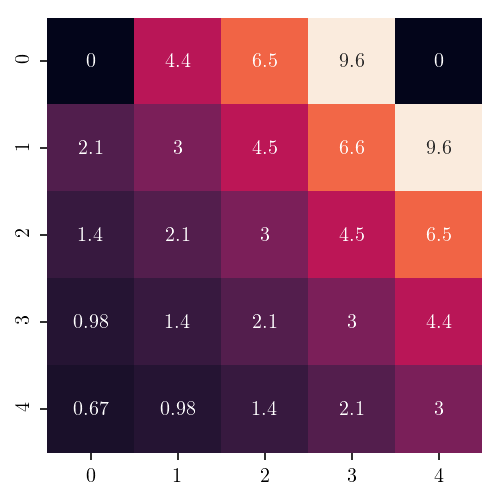

In [14]:
gw.show_values(values, size=4)

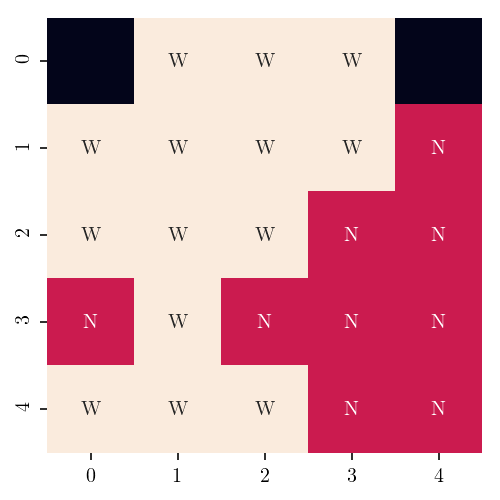

In [18]:
gw.show_policy(policy, size=4)

In [19]:
gw.show_training(gridworld.get_values())

IndexError: too many indices for array

<Figure size 720x432 with 0 Axes>

## 50x50 grid world

In [20]:
gridworld = gw.GridWorld(50, p=.7, discount=.9, save_values=True)

>> Computing transition matrices... Done.   (0.18s)


In [21]:
values, policy = gridworld.value_iteration(threshold=.001)

>> Running value iteration... Done.   (14.45s)


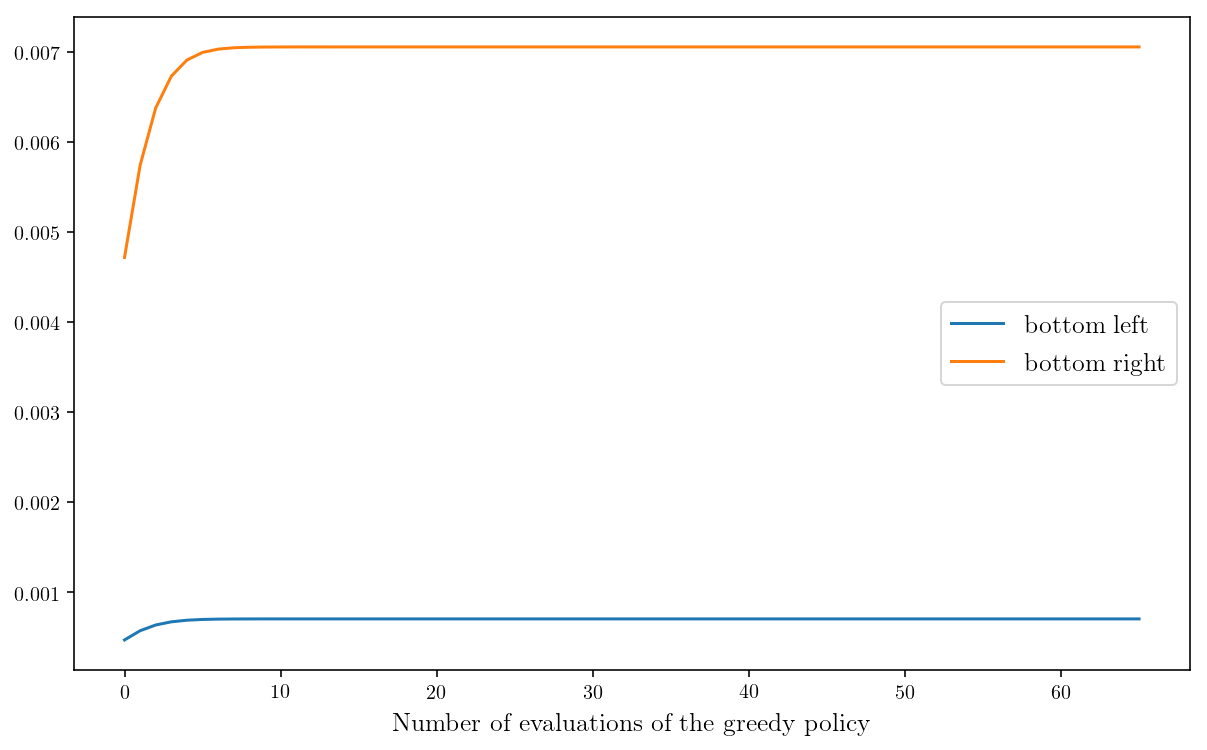

In [23]:
gw.show_training(gridworld.get_values())

In [24]:
np.absolute(gridworld.compute_exact_values(policy) - values).max()

0.003622060343399077

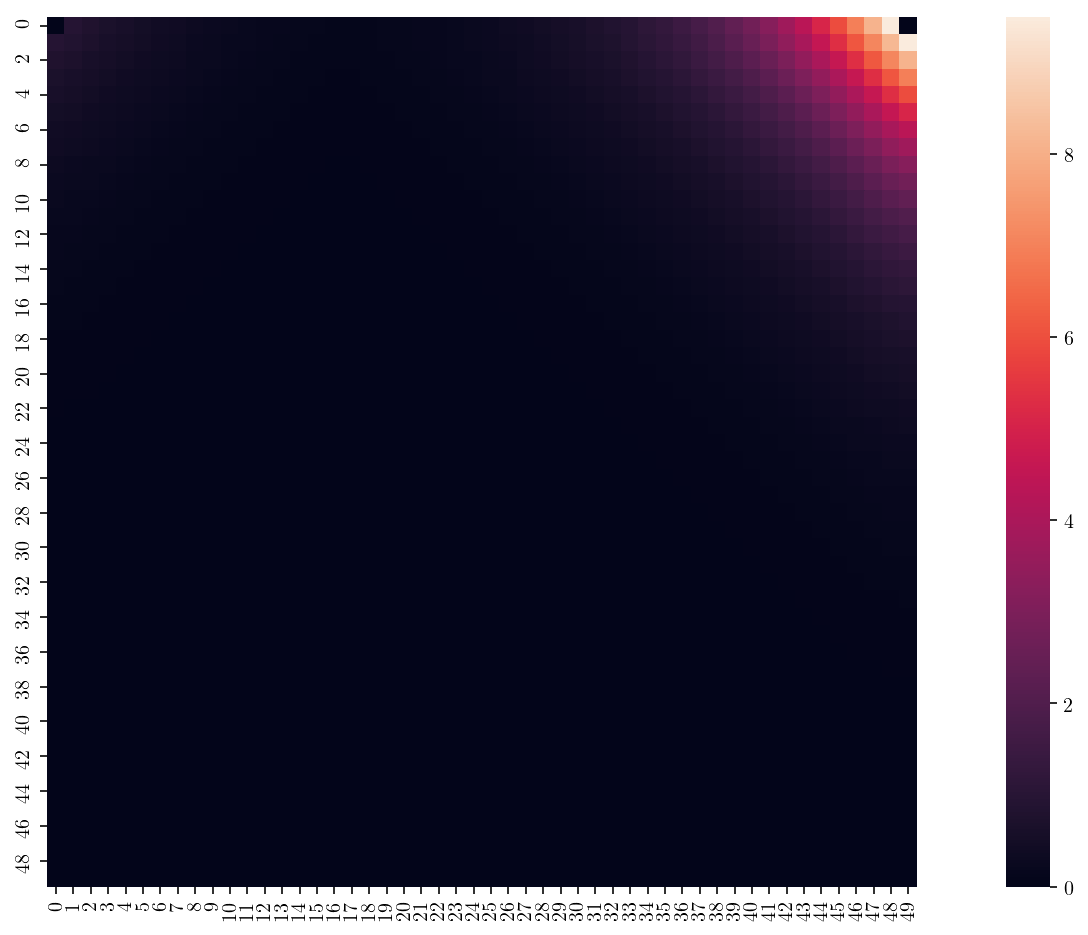

In [25]:
gw.show_values(values, annotate=False, size=8)

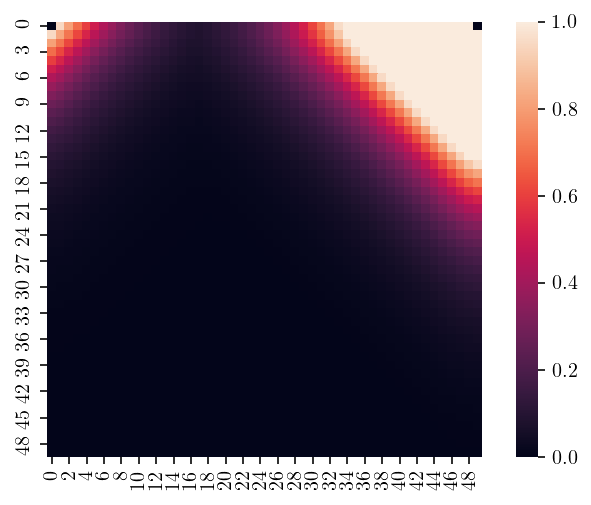

In [26]:
sns.heatmap(values, square=True, vmax=1)

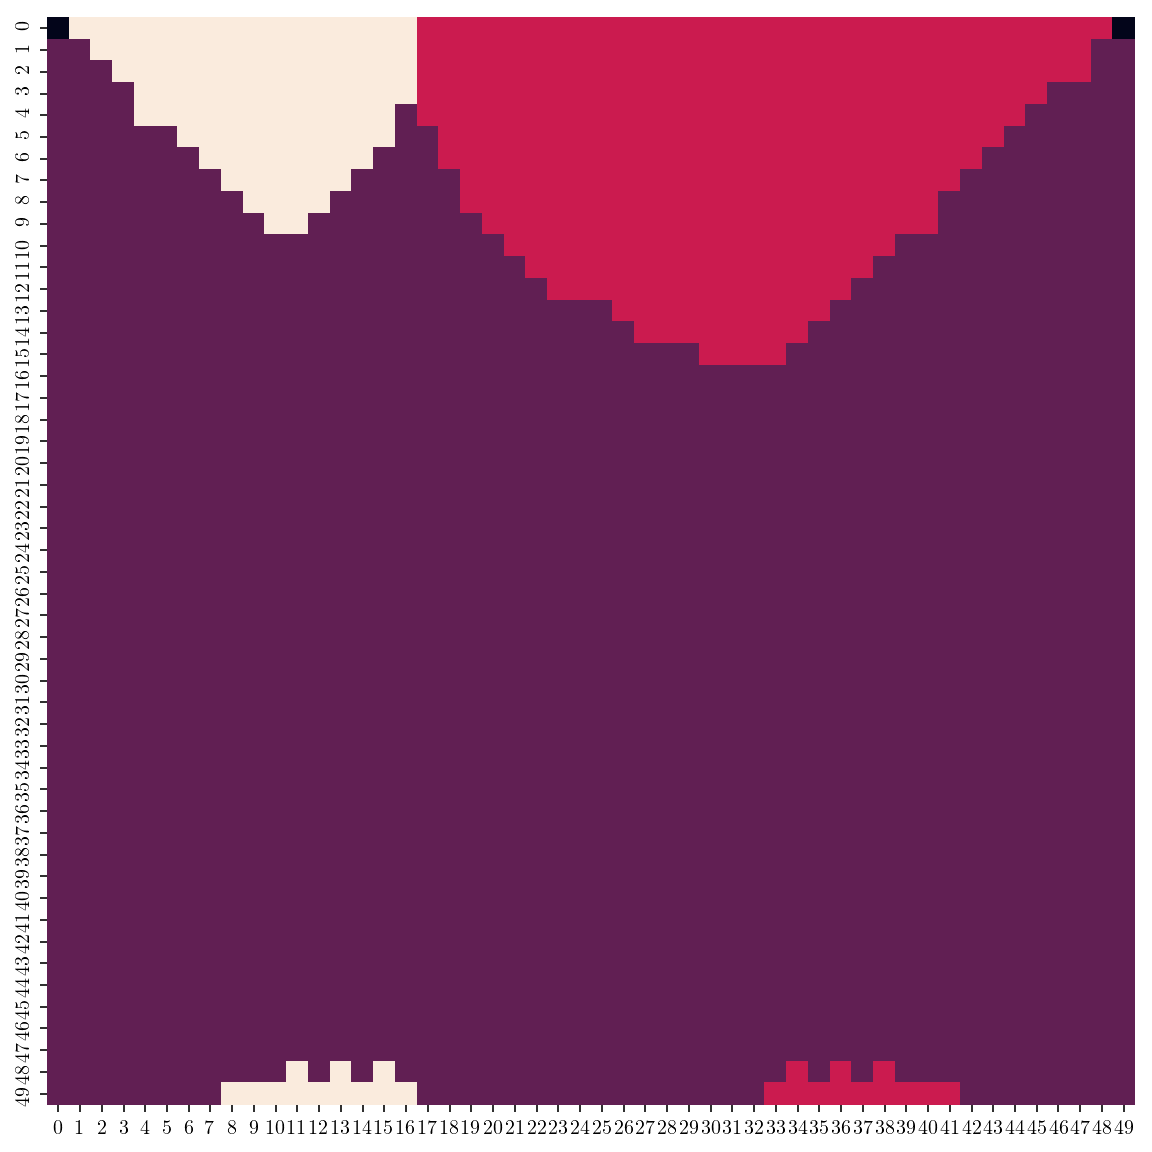

In [27]:
gw.show_policy(policy, annotate=False, size=10)

# Policy Iteration

## Policy Evaluation

In [28]:
gridworld = gw.GridWorld(5, save_values=True)

>> Computing transition matrices... Done.   (0.0s)


In [29]:
values, policy = gridworld.value_iteration(.001)

>> Running value iteration... Done.   (0.01s)


In [30]:
gridworld.policy_evaluation(policy)

array([[0.  , 7.65, 8.76, 9.87, 0.  ],
       [6.08, 6.96, 7.83, 8.79, 9.87],
       [5.54, 6.21, 6.97, 7.83, 8.76],
       [4.95, 5.53, 6.21, 6.97, 7.78],
       [4.44, 4.96, 5.56, 6.22, 6.93]])

In [31]:
gridworld.compute_exact_values(policy)

array([[0.  , 7.65, 8.76, 9.87, 0.  ],
       [6.08, 6.96, 7.83, 8.79, 9.87],
       [5.54, 6.21, 6.97, 7.83, 8.76],
       [4.95, 5.53, 6.21, 6.97, 7.78],
       [4.44, 4.96, 5.56, 6.22, 6.93]])

## Policy Iteration

### 5x5 grid world

In [37]:
gridworld = gw.GridWorld(5, save_values=True)

>> Computing transition matrices... Done.   (0.0s)


In [38]:
values, policy = gridworld.policy_iteration(.001)

>> Running policy iteration... Done.   (0.01s)


In [39]:
gridworld.compute_exact_values(policy)

array([[0.  , 7.65, 8.76, 9.87, 0.  ],
       [6.08, 6.96, 7.83, 8.79, 9.87],
       [5.54, 6.21, 6.97, 7.83, 8.76],
       [4.95, 5.53, 6.21, 6.97, 7.78],
       [4.44, 4.96, 5.56, 6.22, 6.93]])

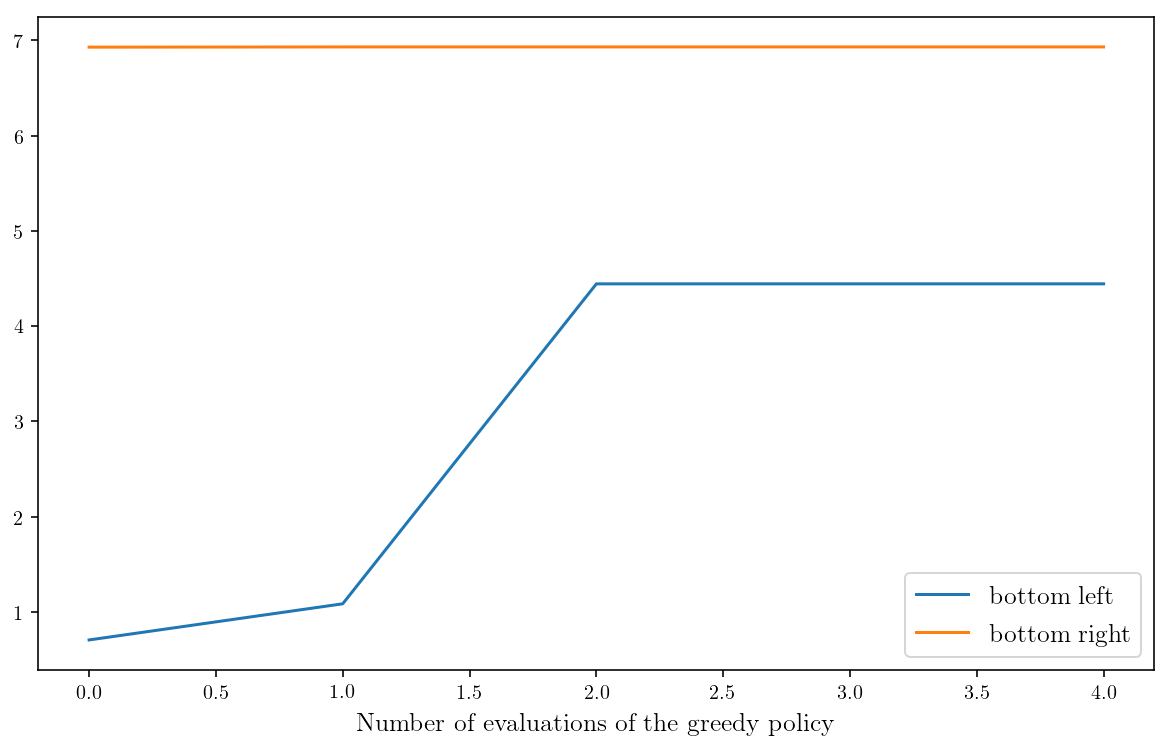

In [40]:
gw.show_training(gridworld.get_values())

### 50x50 grid world

In [41]:
gridworld = gw.GridWorld(50, save_values=True)

>> Computing transition matrices... Done.   (0.12s)


In [42]:
values, policy = gridworld.policy_iteration(threshold=.001)
values

>> Running policy iteration... Done.   (4.04s)


array([[0.00e+00, 9.87e-01, 8.76e-01, ..., 8.76e+00, 9.87e+00, 0.00e+00],
       [9.87e-01, 8.79e-01, 7.83e-01, ..., 7.83e+00, 8.79e+00, 9.87e+00],
       [8.76e-01, 7.83e-01, 6.97e-01, ..., 6.97e+00, 7.83e+00, 8.76e+00],
       ...,
       [4.36e-03, 4.13e-03, 3.77e-03, ..., 3.77e-02, 4.13e-02, 4.36e-02],
       [3.88e-03, 3.67e-03, 3.36e-03, ..., 3.36e-02, 3.67e-02, 3.88e-02],
       [3.46e-03, 3.27e-03, 2.99e-03, ..., 2.99e-02, 3.27e-02, 3.46e-02]])

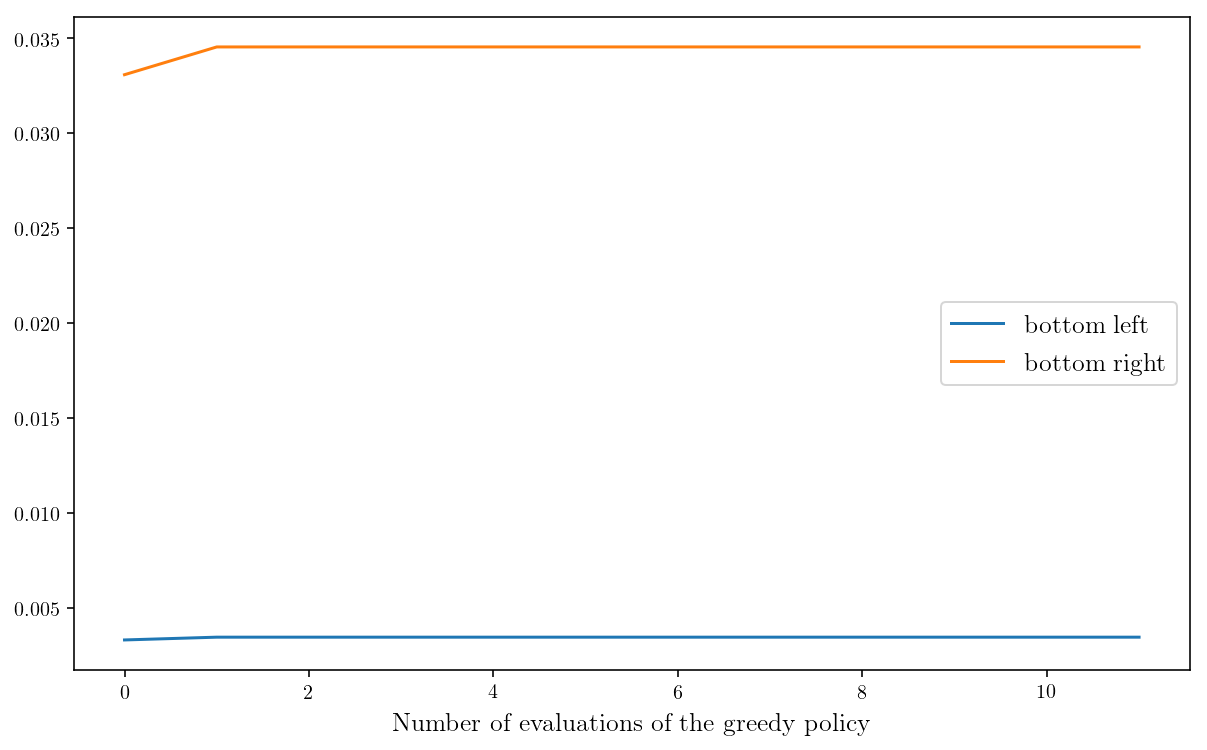

In [43]:
gw.show_training(gridworld.get_values())

## Modified policy iteration

### 5x5 grid world

In [44]:
gridworld = gw.GridWorld(5, save_values=True)

>> Computing transition matrices... Done.   (0.0s)


In [45]:
values, policy = gridworld.modified_policy_iteration(threshold=.001, max_iter=2)
values

>> Running modified policy iteration... Done.   (0.01s)


array([[0.  , 7.65, 8.76, 9.87, 0.  ],
       [6.08, 6.96, 7.83, 8.79, 9.87],
       [5.54, 6.21, 6.97, 7.83, 8.76],
       [4.95, 5.53, 6.21, 6.97, 7.78],
       [4.44, 4.96, 5.56, 6.22, 6.93]])

In [46]:
gridworld.compute_exact_values(policy)

array([[0.  , 7.65, 8.76, 9.87, 0.  ],
       [6.08, 6.96, 7.83, 8.79, 9.87],
       [5.54, 6.21, 6.97, 7.83, 8.76],
       [4.95, 5.53, 6.21, 6.97, 7.78],
       [4.44, 4.96, 5.56, 6.22, 6.93]])

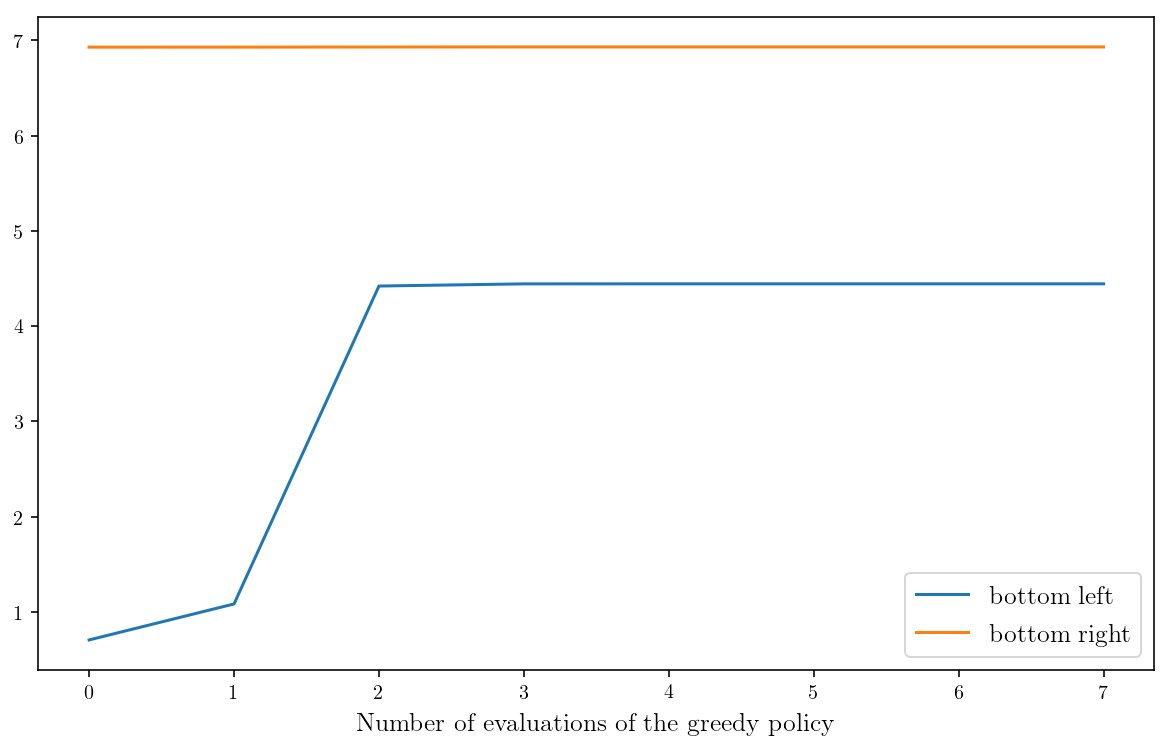

In [47]:
gw.show_training(gridworld.get_values())

### 50x50 grid world

In [48]:
gridworld = gw.GridWorld(50, save_values=True)

>> Computing transition matrices... Done.   (0.13s)


In [51]:
values, policy = gridworld.modified_policy_iteration(threshold=.001, max_iter=2)

>> Running modified policy iteration... Done.   (6.05s)


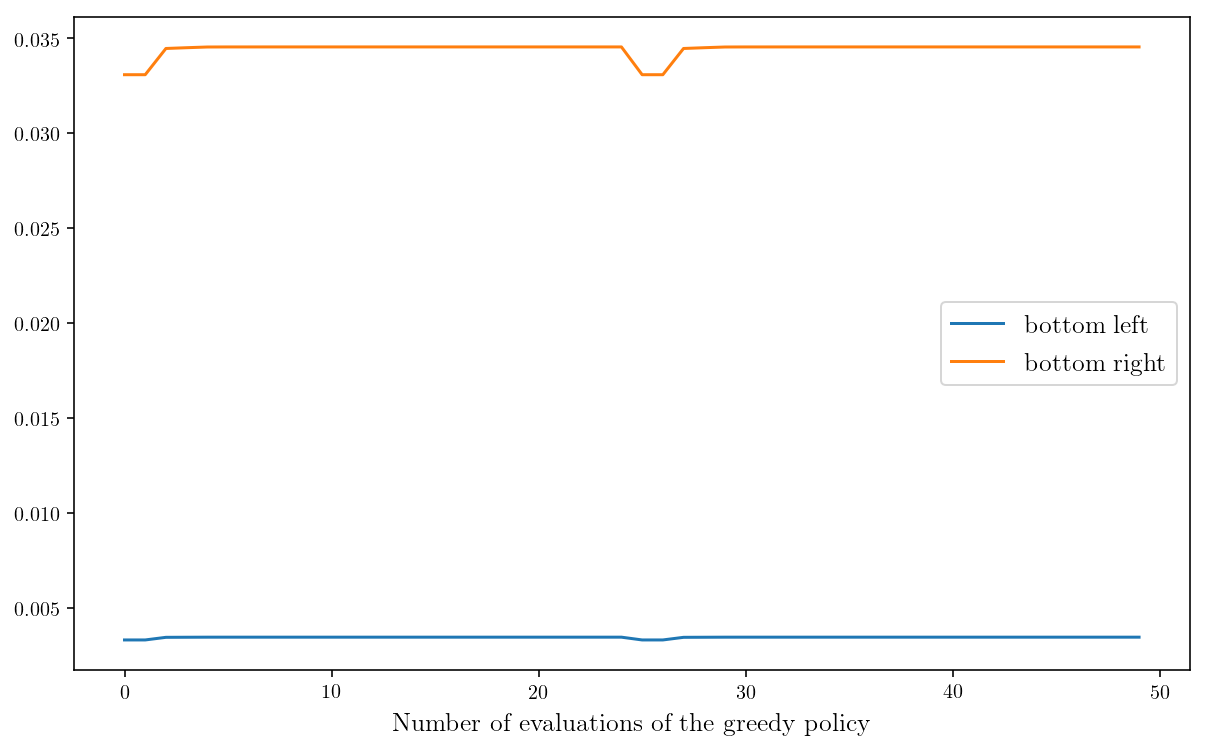

In [52]:
gw.show_training(gridworld.get_values())

Comparison with value iteration.

In [53]:
np.absolute(values - gridworld.value_iteration(threshold=.001)[0]).max()

>> Running value iteration... Done.   (16.73s)


0.003766073894221407